In [ ]:
!pip install gym
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set_style('whitegrid')

In [ ]:
class Policy(object):
    ## indim -> 64 -> 64 -> out_dim
    def __init__(self, in_dim, out_dim, hidden_size):
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hidden_size = hidden_size
        self.layer1, self.layer2 = self.initialize_parameters()
        self.relu = np.vectorize(self.relu_)

    def initialize_parameters(self, ):
        layer1 = np.random.randn(self.in_dim, self.hidden_size[0])*0.1
        layer2 = np.random.randn(self.hidden_size[1], self.out_dim)*0.1
        return layer1, layer2


    def softmax(self,x):
        denominator = np.sum([np.exp(logit) for logit in x])
        results = [np.exp(logit)/denominator for logit in x]
        return results

    def relu_(self,x):
        return max(0, x)

    def forward(self, state, layer1 = None, layer2 = None):
        # make a forward step
        if layer1 is not None  and layer2 is not None:
            
            z1 = np.dot(layer1.T, state)
            a1 = z1 #self.relu(z1)
            z2 = np.dot(layer2.T, a1)
            a2 = z2 #self.softmax(z2)
        else:
            z1 = np.dot(self.layer1.T, state)
            a1 = z1 #self.relu(z1)
            z2 = np.dot(self.layer2.T, a1)
            a2 = z2 #self.softmax(z2)
        return a2


In [ ]:
class Trainer(object):
    # Train a policy with random evolutionary 
    def __init__(self, policy, environment, num_iters, std = 0.1, num_population= 100, n_elites = 20):
        self.policy = policy
        self.std = std
        self.environment  = environment
        self.reward_progress = []
        self.num_iters = num_iters
        self.num_population = num_population
        self.n_elites = n_elites

    def evaluate_population(self, layer1_pop, layer2_pop):
        """complete a trajectory with each of the weight set, and return total reward"""
        rewards = []
        for i in range(self.num_population):
            total_reward = 0
            obs = env.reset()
            while True:
                action = np.argmax(policy.forward(obs, layer1 = layer1_pop[i], layer2 = layer2_pop[i]))
                obs, reward, done, inf = self.environment.step(action)
                total_reward += reward
                if done:
                    rewards.append(total_reward)
                    break
        assert len(rewards) == self.num_population
        return rewards

    def evaluate_current_weights(self):
        total_reward = 0
        obs = self.environment.reset()
        while True:
            action = np.argmax(self.policy.forward(obs))
            obs, reward, done, info = self.environment.step(action)
            total_reward += reward
            if done:
                break

        self.reward_progress.append(total_reward)

    def train(self):
        for i in tqdm(range(self.num_iters)):
            layer1_pop = [self.policy.layer1 + self.std*(np.random.randn(*self.policy.layer1.shape)) for i in range(self.num_population)]
            layer2_pop = [self.policy.layer2 + self.std*(np.random.randn(*self.policy.layer2.shape)) for i in range(self.num_population)]

            rewards = np.array(self.evaluate_population(layer1_pop, layer2_pop))

            elite_idxs = rewards.argsort()[-self.n_elites:]
            # print(elite_idxs)
            layer1_pop = [layer1_pop[idx] for idx in elite_idxs]
            layer2_pop = [layer2_pop[idx] for idx in elite_idxs]

            rewards = [rewards[i] for i in elite_idxs]
            policy.layer1 = np.average(layer1_pop, axis = 0, weights= rewards)
            policy.layer2 = np.average(layer2_pop, axis = 0, weights= rewards)
            self.evaluate_current_weights()
            print("Current reward: ", self.reward_progress[i])
        self.plot_reward_progress()
        return policy

    def plot_reward_progress(self):
        sns.lineplot(x = np.arange(0,self.num_iters), y = self.reward_progress)
        plt.show()


In [ ]:
env = gym.make('CartPole-v1')

In [ ]:
policy = Policy(4,2, [512, 512] )

Current reward:  25.0
Current reward:  142.0
Current reward:  200.0
Current reward:  500.0
Current reward:  500.0
Current reward:  500.0
Current reward:  500.0
Current reward:  500.0
Current reward:  500.0
Current reward:  500.0



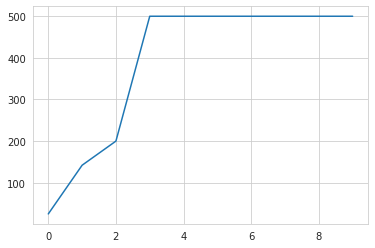

In [ ]:
trainer = Trainer(policy, env, 10)
policy = trainer.train()

In [ ]:
tries = 100
rewards = []
for i in range(tries):
    total_reward = 0
    obs = env.reset()
    while True:
        action = np.argmax(policy.forward(obs))
        obs, reward, done, inf = env.step(action)
        total_reward+= reward
        if done:
            obs = env.reset()
            rewards.append(total_reward)
            break
